# 1 课堂示例代码-英文

## 1.1 twitter数据导入

In [1]:
# 导入数据
import pandas as pd
text_ana = pd.read_csv('text_analysis_twitter.csv')
text_ana = text_ana.drop(['Unnamed: 0'],axis=1)

## 1.2 twitter数据预处理

In [2]:
# 小写转换与URL移除

import re

def preprocess_text(text):
    # 转化为小写
    text = text.lower()

    # 移除url
    text = re.sub(r'http\S+','',text)

    return text

## 1.3 训练并运用词袋模型对twitter文本进行分析

In [3]:
# 使用CountVectorizer构建词袋模型

from sklearn.feature_extraction.text import CountVectorizer

# 初始化CountVectorizer
vectorizer = CountVectorizer()

# 将文本数据转换为词袋特征矩阵
X = vectorizer.fit_transform(text_ana["text"].apply(preprocess_text))

X

# 展示特征矩阵的形状
print('词袋特征矩阵的形状:', X.shape)

# 展示词袋模型中的所有特征词
print('特征词列表:',vectorizer.get_feature_names_out())

词袋特征矩阵的形状: (300000, 121376)
特征词列表: ['00' '000' '0000' ... '투표하십시오' '한국어' 'ﬂees']


In [5]:
# 词袋特征矩阵转换为数组列表
list(X.toarray())

MemoryError: Unable to allocate 271. GiB for an array with shape (300000, 121376) and data type int64

In [6]:
# 词频统计

# 获取词汇表
feature_words = vectorizer.get_feature_names_out()

# 计算词频统计
word_freq = dict(zip(feature_words, X.sum(axis=0).A1))

In [7]:
# 观察词袋模型的词频计数结果
sorted (word_freq.items(), key=lambda x: x[1], reverse=True)

[('the', 247160),
 ('to', 235370),
 ('of', 112428),
 ('in', 104912),
 ('and', 104025),
 ('for', 102100),
 ('rt', 83461),
 ('on', 72986),
 ('amp', 65500),
 ('is', 64785),
 ('we', 53564),
 ('our', 49736),
 ('this', 45532),
 ('you', 40235),
 ('with', 39027),
 ('it', 38749),
 ('that', 38161),
 ('qt', 35691),
 ('at', 33821),
 ('are', 31301),
 ('will', 29565),
 ('tax', 28529),
 ('my', 27644),
 ('be', 26920),
 ('from', 26202),
 ('today', 24574),
 ('have', 23005),
 ('by', 22865),
 ('more', 22665),
 ('trump', 19894),
 ('bill', 19534),
 ('their', 19129),
 ('about', 18973),
 ('as', 18391),
 ('all', 18295),
 ('not', 18197),
 ('your', 17615),
 ('who', 17098),
 ('can', 15465),
 ('health', 14215),
 ('has', 14119),
 ('an', 13861),
 ('they', 13858),
 ('us', 13825),
 ('here', 13799),
 ('house', 13680),
 ('people', 13486),
 ('great', 13468),
 ('now', 13113),
 ('families', 12838),
 ('must', 12787),
 ('up', 12602),
 ('was', 12513),
 ('need', 12313),
 ('americans', 12279),
 ('help', 12145),
 ('act', 12064),

## 1.4 绘制词云图

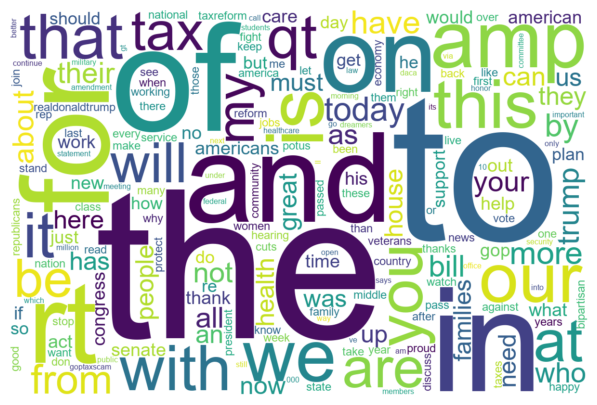

<Figure size 640x480 with 0 Axes>

In [8]:
# 根据词袋模型分析结果绘制词云图

from wordcloud import WordCloud
import matplotlib.pyplot as plt 

wc = WordCloud(
    width=1200, 
    height=800, 
    background_color='white', 
    font_path='arial.ttf'
).generate_from_frequencies(word_freq)

# 显示词云图
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()
plt.savefig('wordcloud_twi.png', dpi=100)

# 2 课堂示例代码-中文

## 2.1 微博数据导入

In [1]:
# 导入数据
import pandas as pd
text_ana = pd.read_csv('text_analysis_weibo.csv', index_col = 0)
text_ana

,标题/微博内容,点赞,转发,评论,账号昵称UID加密,粉丝数,关注数,地域
0,#高校通报教师图书馆打电话声音过大出言不逊#公道自在人心，谣言自在人心 ​​,0,0,0,a2331b38901d62d2d9a20529177ef3b3,0,22,湖北
1,转发C,0,0,0,d6dc4470f51fce93cc0cbad8abf55a75,0,33,广西
2,【#刘雨昕运动者联濛#河山覆冰雪，健儿迎冬奥[金牌]全能唱跳不设限，运动联濛开新年🇨🇳 期待...,0,0,0,372bc4782eb442b88035f920a7c1a68e,6,85,广东
3,丁程鑫//@丁程鑫后援会官博:#丁程鑫[超话]# ✨#丁程鑫 二十成金筑梦鑫世界# 大年初一...,0,0,0,6fe0d482bd3e78a3483e2a1d57f14ef2,75,1012,广东
4,诶，你们真不要脸诶。。。没资格宣传奥运。。。抵制抵制！,0,0,0,872380d71d6ee9130e8b49d331f2baa9,0,10,广东
...,...,...,...,...,...,...,...,...
49995,935天气路况早知道 2022年3月2日 星期三 今日限行尾号3和8 8：00分发布 ...,0,0,0,2231ab79796d569625633acafd9f1351,445,74,河南
49996,4月1日起，交通违法记分规则重大调整！ http://t.cn/A66zxfR0 ​​,0,0,0,91c9d380c1cc7811be5ee10ce510d77a,842,54,甘肃
49997,转发C,0,0,1,301771db13798e2dd493c02a44e59444,99,3433,江苏
49998,全体 甘肃车主注意 4月1日起，全面实施！ ...,0,0,0,NaN,0,0,甘肃


In [6]:
# 提取非空文本数据并转换为列表
text = list(text_ana['标题/微博内容'].dropna())
text

['#       高校       通报       教师       图书馆       打电话       声音       过大       出言不逊       #       公道       自       在       人心       ，       谣言       自       在       人心               \u200b       \u200b',
 '转发       C',
 '【       #       刘雨昕       运动       者       联       濛       #       河山       覆       冰雪       ，       健儿       迎       冬奥       [       金牌       ]       全能       唱       跳       不       设限       ，       运动       联       濛       开       新年       🇨       🇳               期待       全能       音乐       人       @       刘雨昕               与       #       运动       者       联       濛       #       一起       ，       为       冬奥       赛事       助力       加油       ！       】',
 '丁程鑫       /       /       @       丁程鑫       后援会       官博       :       #       丁程鑫       [       超话       ]       #               ✨       #       丁程鑫               二十       成金筑梦鑫       世界       #               大年初一       锁定       @       北京       卫视               和       门面       主舞       @       时代       少年       团     

# 2.2 jieba分词

In [7]:
# 基于jieba库的文本分词处理

import jieba

def word_segmentation(text):
    words = jieba.lcut(text)
    return ' '.join(words)

text_ana['标题/微博内容'] = text_ana['标题/微博内容'].iloc[:100].astype(str).apply(word_segmentation)
text_ana['标题/微博内容'].head()

0    #               高校               通报           ...
1                                   转发               C
2    【               #               刘雨昕           ...
3    丁程鑫               /               /           ...
4    诶               ，               你们            ...
Name: 标题/微博内容, dtype: object

In [8]:
# 提取非空文本数据并转换为列表
text = list(text_ana['标题/微博内容'].dropna())
text

['#               高校               通报               教师               图书馆               打电话               声音               过大               出言不逊               #               公道               自               在               人心               ，               谣言               自               在               人心                               \u200b               \u200b',
 '转发               C',
 '【               #               刘雨昕               运动               者               联               濛               #               河山               覆               冰雪               ，               健儿               迎               冬奥               [               金牌               ]               全能               唱               跳               不               设限               ，               运动               联               濛               开               新年               🇨               🇳                               期待               全能               音乐               人               @               

## 2.3 训练并运用词袋模型对微博文本进行分析

In [9]:
# 使用CountVectorizer构建词袋模型

from sklearn.feature_extraction.text import CountVectorizer

# 初始化CountVectorizer
vectorizer = CountVectorizer()

# 将文本数据转换为词袋特征矩阵
X = vectorizer.fit_transform(text)

# 展示特征矩阵的形状
print('词袋特征矩阵的形状:', X.shape)

词袋特征矩阵的形状: (100, 599)


In [10]:
# 展示词袋模型中的所有特征词
print('特征词列表:',vectorizer.get_feature_names_out())

特征词列表: ['0414' '1020' '167' '17' '18' '19' '2022' '25' '26' '50' 'a669n33f'
 'a66hqzun' 'a66v9mln' 'a6i5bc1o' 'a6ierqv2' 'a6igrcur' 'a6ikvewj'
 'a6ikxrlc' 'a6ilerdz' 'a6ipxoe0' 'a6jy3xv2' 'a6mn51qh' 'a6xwbtdu' 'an35'
 'c2021' 'call' 'cn' 'cosmo' 'cosmo5' 'cup' 'heytea' 'http' 'into1' 'kiki'
 'liveshow' 'lm' 'm28' 'mv' 'rap' 'tfboys' 'to19' 'um' 'vocal' 'wzy'
 'yyds' '一个' '一休' '一天' '一定' '一封' '一届' '一张' '一日' '一片' '一种' '一组' '一起' '一辈子'
 '丁哥' '丁程鑫' '万事' '万里' '三珩' '不仅' '不停' '不是' '不畏' '不要' '不要脸' '不语' '世界' '东奥'
 '东方' '东西' '东进' '严浩翔' '中华' '中国' '中国画' '中国队' '中央美术学院' '丰富多彩' '主舞' '之后' '之火'
 '之约' '之美' '了解' '二十' '产生' '京东' '人心' '人生' '什么' '他们' '代入' '代表团' '代言' '代言人'
 '以此' '休息' '优秀' '会长' '传播' '位列' '位送' '低沉' '你们' '你好' '便是' '保护' '信号' '健儿'
 '兄弟' '全能' '全面' '公道' '六个' '共祝' '关心' '关注' '关键' '其中' '养乐多' '兼好' '再说' '写下'
 '冠军' '冬天' '冬奥' '冬奥会' '冬季' '冬日' '冬梦之约' '冰墩' '冰壶' '冰雪' '准时' '凝聚' '出演'
 '出言不逊' '分享' '刘耀文' '刘雨昕' '刚刚开始' '创冰墩' '前辈' '加油' '加盟' '助力' '助威' '助阵' '努力'
 '劲儿' '勇士' '北京' '十八' '十八岁' '十六个' '十分' '十大' '千玺' '单人滑' '单届' 

In [11]:
# 词袋特征矩阵转换为数组列表
list(X.toarray())

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [12]:
# 词频统计

# 获取词汇表
feature_words = vectorizer.get_feature_names_out()

# 计算词频统计
word_freq = dict(zip(feature_words, X.sum(axis=0).A1))

In [13]:
# 词袋模型中不重复的词汇的数量
len(word_freq)

599

In [14]:
# 观察词袋模型的词频计数结果
sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

[('转发', 33),
 ('冬奥', 30),
 ('一起', 29),
 ('北京', 25),
 ('刘雨昕', 20),
 ('运动', 18),
 ('加油', 17),
 ('少年', 14),
 ('cn', 13),
 ('http', 13),
 ('冬奥会', 12),
 ('未来', 12),
 ('冰雪', 11),
 ('健儿', 10),
 ('宋亚轩', 10),
 ('时代', 10),
 ('call', 9),
 ('期待', 8),
 ('中国', 7),
 ('全能', 6),
 ('分享', 6),
 ('徐坤', 6),
 ('我们', 6),
 ('超话', 6),
 ('into1', 5),
 ('丁程鑫', 5),
 ('冰墩', 5),
 ('努力', 5),
 ('周深', 5),
 ('感谢', 5),
 ('林墨', 5),
 ('真的', 5),
 ('自己', 5),
 ('金牌', 5),
 ('音乐', 5),
 ('关注', 4),
 ('助力', 4),
 ('卫视', 4),
 ('后援会', 4),
 ('唱响', 4),
 ('尹浩宇', 4),
 ('新年', 4),
 ('春晚', 4),
 ('朱一龙', 4),
 ('李宇春', 4),
 ('歌手', 4),
 ('温柔', 4),
 ('致敬', 4),
 ('赛场', 4),
 ('19', 3),
 ('一定', 3),
 ('不是', 3),
 ('千玺', 3),
 ('卡布', 3),
 ('可以', 3),
 ('声音', 3),
 ('奥运健儿', 3),
 ('官方', 3),
 ('害羞', 3),
 ('张哥', 3),
 ('日常', 3),
 ('时间', 3),
 ('明星', 3),
 ('涵江', 3),
 ('照亮', 3),
 ('照顾', 3),
 ('燕京啤酒', 3),
 ('生日', 3),
 ('直播', 3),
 ('相信', 3),
 ('相约', 3),
 ('祝福', 3),
 ('罗一舟', 3),
 ('视频', 3),
 ('觉得', 3),
 ('赛事', 3),
 ('越来越', 3),
 ('进行', 3),
 ('一个', 2),
 ('一辈子', 2),
 (

## 2.4 绘制词云图

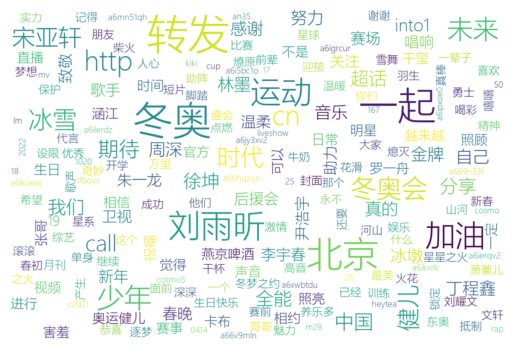

In [15]:
# 根据词袋模型分析结果绘制词云图

from wordcloud import WordCloud
import matplotlib.pyplot as plt 

# 根据词袋模型分析结果绘制词云图
wordcloud = WordCloud(
    font_path='msyhl.ttc',  # 指定中文字体文件路径
    background_color='white',  # 设置背景颜色
    width=1200,
    height=800,
    max_words=200,  # 设置最大显示的词数
    max_font_size=100  # 设置字体最大值
).generate_from_frequencies(word_freq)

# 显示词云图
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# 3 代码练习-智慧养老政策

## 3.1 智慧养老政策文本数据导入

In [16]:
# 导入数据
import pandas as pd
text_ana = pd.read_csv('智慧养老政策.csv', encoding='gbk')
text_ana

,序号,标题,时效性,效力位阶,制定机关,发文字号,公布日期,施行日期,批准部门,批准日期,原文链接
0,地方规范性文件_672,黑龙江省人民政府办公厅关于推进养老服务发展的实施意见,现行有效,地方规范性文件,黑龙江省民政厅,NaN,NaN,NaN,NaN,NaN,https://www.pkulaw.com/lar/b18e6be8f51692a1cbd...
1,地方规范性文件_673,广西壮族自治区大数据发展局关于全面推进数字化转型发展的意见,现行有效,地方规范性文件,广西壮族自治区大数据发展局,NaN,NaN,NaN,NaN,NaN,https://www.pkulaw.com/lar/22f0c8beef6908e6866...
2,地方规范性文件_674,中共无锡市委、无锡市人民政府印发《＜关于加快推进数字经济高质量发展的实施意见＞＜关于加快推进...,现行有效,地方规范性文件,无锡市人民政府,NaN,NaN,NaN,NaN,NaN,https://www.pkulaw.com/lar/42b6a5f466eaa99be8e...
3,地方规范性文件_675,贵阳市民政局关于推进贵阳贵安养老服务高质量发展的实施意见,现行有效,地方规范性文件,贵阳市民政局,NaN,NaN,NaN,NaN,NaN,https://www.pkulaw.com/lar/e67d28d08fea8084a66...
4,地方规范性文件_676,廊坊市人民政府办公室关于加快推进养老服务体系建设的实施意见,现行有效,地方规范性文件,廊坊市人民政府,NaN,NaN,NaN,NaN,NaN,https://www.pkulaw.com/lar/909deb5c2273a94ef8b...
...,...,...,...,...,...,...,...,...,...,...,...
2777,地方工作文件_15,郑州市人民政府关于印发郑州市数字政府建设行动方案的通知,现行有效,地方工作文件,郑州市人民政府,郑政〔2023〕25号,2023.12.25,2023.12.25,NaN,NaN,https://www.pkulaw.com/lar/b7908e42b1682d8bafd...
2778,部门规章_1,产业结构调整指导目录(2024年本),尚未施行,部门规章,国家发展和改革委员会(含原国家发展计划委员会、原国家计划委员会),中华人民共和国国家发展和改革委员会令第7号,2023.12.27,2024.02.01,NaN,NaN,https://www.pkulaw.com/chl/d8513a2dd8e4e297bdf...
2779,地方工作文件_14,山西省人民政府办公厅关于印发山西省数字政府建设规划(2023―2025年)的通知,现行有效,地方工作文件,山西省人民政府,晋政办发〔2023〕82号,2023.12.28,2023.12.28,NaN,NaN,https://www.pkulaw.com/lar/cf041968e90d5c7d666...
2780,地方工作文件_13,山东省人民政府办公厅关于印发《山东省养老服务高质量发展三年行动计划(2024—2026年)》的通知,现行有效,地方工作文件,山东省人民政府,鲁政办字〔2023〕207号,2023.12.30,2023.12.30,NaN,NaN,https://www.pkulaw.com/lar/d0f5a014d1a25e2fc83...


## 3.2 jieba分词及文本预处理

In [17]:
# 基于jieba库的文本分词处理

import jieba

def word_segmentation(text):
    words = jieba.lcut(text)
    return ' '.join(words)

text_ana['标题'] = text_ana['标题'].astype(str).apply(word_segmentation)
text_ana['标题'].head()

0                 黑龙江省 人民政府 办公厅 关于 推进 养老 服务 发展 的 实施 意见
1             广西壮族自治区 大 数据 发展局 关于 全面 推进 数字化 转型 发展 的 意见
2    中共 无锡市委 、 无锡市 人民政府 印发 《 ＜ 关于 加快 推进 数字 经济 高质量 发...
3             贵阳市 民政局 关于 推进 贵阳 贵安 养老 服务 高质量 发展 的 实施 意见
4             廊坊市 人民政府 办公室 关于 加快 推进 养老 服务体系 建设 的 实施 意见
Name: 标题, dtype: object

In [24]:
# 智慧养老政策文本预处理

import re
import string 

# 定义中文标点符号列表  
chinese_punctuation = '()（）《》＜＞“”'  

# 定义预处理函数  
def preprocess_text(text):  
    # 去除标点符号  
    text = re.sub(f'[{re.escape(chinese_punctuation)}]+', '', text)  
      
    # 去除数字  
    text = re.sub(r'\d+', '', text)  
      
    # 去除指定文字  
    stopwords = ['关于', '人民政府', '印发']  
    for word in stopwords:  
        text = text.replace(word, '')  
    return text  
  
# 预处理文本数据  
preprocessed_text_list = [preprocess_text(text) for text in text]  
  
# 打印预处理后的文本列表  
for text in preprocessed_text_list:  
    print(text)

黑龙江省  办公厅  推进 养老 服务 发展 的 实施 意见
广西壮族自治区 大 数据 发展局  全面 推进 数字化 转型 发展 的 意见
中共 无锡市委 、 无锡市      加快 推进 数字 经济 高质量 发展 的 实施 意见    加快 推进 总部 经济 高质量 发展 的 实施 意见    加快 推进 枢纽 经济 高质量 发展 的 实施 意见   的 通知
贵阳市 民政局  推进 贵阳 贵安 养老 服务 高质量 发展 的 实施 意见
廊坊市  办公室  加快 推进 养老 服务体系 建设 的 实施 意见
上海市浦东新区 民政局  街道  镇  老年人 综合 服务中心 服务 功能 和 设施 配置 的 通知
厦门市    加快 发展 养老 服务业 实施 意见 的 通知
北京市 平谷区     加快 信息化 发展 建设  智慧 平谷  的 意见  的 通知
南平市   加快 发展 养老 服务业 的 实施 意见
烟台市  办公室  促进 信息 消费 扩大内需 的 实施 意见
杭州市  办公厅   深化 农村 居家 养老 服务 实施办法 的 通知
平湖市   加快 发展 养老 服务业 的 实施 意见
无锡市  办公室   智慧 无锡 建设 资金 管理 办法  暂行  的 通知
宁波市  办公厅  促进 宁波 信息 消费 的 实施 意见
无锡市 政府  加快 发展 养老 服务业 的 实施 意见
湖州市   加快 发展 养老 服务业 的 实施 意见   
绍兴市   进一步 加快 养老 服务业 发展 的 意见
丽水市   加快 发展 养老 服务业 的 实施 意见
杭州市   加快 养老 服务业 改革 与 发展 的 意见
九江市   加快 发展 养老 服务业 的 实施 意见
忻州市  办公厅   忻州市 智慧 城市 建设 实施 意见 的 通知
赣州市   加快 发展 养老 服务业 的 实施 意见
赣州市  办公厅  转发  市 民政局  鼓励 和 支持 社会 力量 进入 养老 服务 领域 的 实施 意见  的 通知
厦门市 财政局 、 厦门市 创建 国家 信息 消费 示范 城市 领导小组 办公室     信息 消费 专项 行动 财政 扶持 的 意见  的 通知
桐乡市    加快 发展 互联网 经济 实施 意见 的 通知
无锡市 财政局 、 无锡市 民政局  完善 养老 服务业

In [25]:
# 提取非空文本数据并转换为列表
text = list(text_ana['标题'])
text

['黑龙江省 人民政府 办公厅 关于 推进 养老 服务 发展 的 实施 意见',
 '广西壮族自治区 大 数据 发展局 关于 全面 推进 数字化 转型 发展 的 意见',
 '中共 无锡市委 、 无锡市 人民政府 印发 《 ＜ 关于 加快 推进 数字 经济 高质量 发展 的 实施 意见 ＞ ＜ 关于 加快 推进 总部 经济 高质量 发展 的 实施 意见 ＞ ＜ 关于 加快 推进 枢纽 经济 高质量 发展 的 实施 意见 ＞ 》 的 通知',
 '贵阳市 民政局 关于 推进 贵阳 贵安 养老 服务 高质量 发展 的 实施 意见',
 '廊坊市 人民政府 办公室 关于 加快 推进 养老 服务体系 建设 的 实施 意见',
 '上海市浦东新区 民政局 关于 街道 ( 镇 ) 老年人 综合 服务中心 服务 功能 和 设施 配置 的 通知',
 '厦门市 人民政府 关于 印发 加快 发展 养老 服务业 实施 意见 的 通知',
 '北京市 平谷区 人民政府 关于 印发 《 加快 信息化 发展 建设 “ 智慧 平谷 ” 的 意见 》 的 通知',
 '南平市 人民政府 关于 加快 发展 养老 服务业 的 实施 意见',
 '烟台市 人民政府 办公室 关于 促进 信息 消费 扩大内需 的 实施 意见',
 '杭州市 人民政府 办公厅 关于 印发 深化 农村 居家 养老 服务 实施办法 的 通知',
 '平湖市 人民政府 关于 加快 发展 养老 服务业 的 实施 意见',
 '无锡市 人民政府 办公室 关于 印发 智慧 无锡 建设 资金 管理 办法 ( 暂行 ) 的 通知',
 '宁波市 人民政府 办公厅 关于 促进 宁波 信息 消费 的 实施 意见',
 '无锡市 政府 关于 加快 发展 养老 服务业 的 实施 意见',
 '湖州市 人民政府 关于 加快 发展 养老 服务业 的 实施 意见 ( 2014 )',
 '绍兴市 人民政府 关于 进一步 加快 养老 服务业 发展 的 意见',
 '丽水市 人民政府 关于 加快 发展 养老 服务业 的 实施 意见',
 '杭州市 人民政府 关于 加快 养老 服务业 改革 与 发展 的 意见',
 '九江市 人民政府 关于 加快 发展 养老 服务业 的 实施 意见',
 '忻州市 人民政府 办公厅 关于 印发 忻州市 智慧 城市 建设 实施

## 3.3 训练并运用词袋模型对智慧养老政策文本进行分析

In [26]:
# 使用CountVectorizer构建词袋模型

from sklearn.feature_extraction.text import CountVectorizer

# 初始化CountVectorizer
vectorizer = CountVectorizer()

# 将文本数据转换为词袋特征矩阵
X = vectorizer.fit_transform(iter(preprocessed_text_list))

# 展示特征矩阵的形状
print('词袋特征矩阵的形状:', X.shape)

词袋特征矩阵的形状: (2782, 2137)


In [27]:
# 展示词袋模型中的所有特征词
print('特征词列表:', vectorizer.get_feature_names_out())

特征词列表: ['app' 'ppp' '一体化' ... '龙港' '龙湾区' '龙胜各族自治县']


In [29]:
# 词袋特征矩阵转换为数组列表
list(X.toarray())

[array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dt

In [30]:
# 词频统计

# 获取词汇表
feature_words = vectorizer.get_feature_names_out()

# 计算词频统计
word_freq = dict(zip(feature_words, X.sum(axis=0).A1))

In [31]:
# 词袋模型中不重复的词汇的数量
len(word_freq)

2137

In [32]:
# 观察词袋模型的词频计数结果
sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

[('通知', 2191),
 ('发展', 1260),
 ('养老', 1067),
 ('办公室', 939),
 ('规划', 737),
 ('服务', 653),
 ('意见', 450),
 ('建设', 442),
 ('实施', 427),
 ('实施方案', 409),
 ('办公厅', 395),
 ('工作', 385),
 ('十四五', 381),
 ('推进', 306),
 ('方案', 269),
 ('委员会', 262),
 ('健康', 253),
 ('改革', 243),
 ('加快', 218),
 ('民政局', 198),
 ('社会', 193),
 ('提升', 186),
 ('行动', 183),
 ('数字', 178),
 ('服务业', 174),
 ('促进', 169),
 ('市场', 164),
 ('居家', 160),
 ('经济', 160),
 ('服务体系', 153),
 ('事业', 151),
 ('全面', 142),
 ('社区', 141),
 ('智慧', 138),
 ('政府', 134),
 ('高质量', 134),
 ('服务质量', 130),
 ('老龄', 129),
 ('行动计划', 125),
 ('放开', 123),
 ('产业', 122),
 ('上海市', 118),
 ('河南省', 118),
 ('国民经济', 116),
 ('信息化', 109),
 ('三年', 108),
 ('民政厅', 108),
 ('十三', 106),
 ('卫生', 106),
 ('创新', 105),
 ('五年', 101),
 ('北京市', 99),
 ('目标', 98),
 ('重庆市', 98),
 ('体系', 96),
 ('进一步', 91),
 ('开展', 88),
 ('浙江省', 88),
 ('第十四', 88),
 ('远景', 87),
 ('项目', 85),
 ('消费', 83),
 ('纲要', 81),
 ('城市', 79),
 ('妇女', 78),
 ('儿童', 77),
 ('条例', 77),
 ('杭州市', 75),
 ('要点', 74),
 ('三五年', 73),
 ('一老', 

## 3.4 绘制词云图

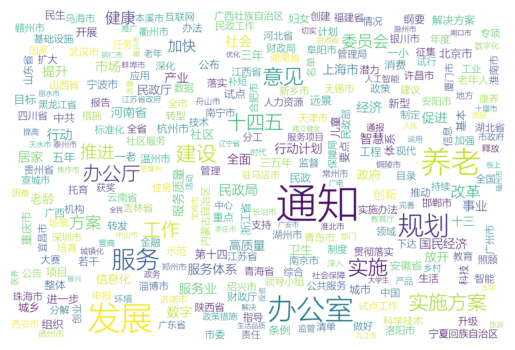

In [33]:
# 根据词袋模型分析结果绘制词云图

from wordcloud import WordCloud
import matplotlib.pyplot as plt 

# 根据词袋模型分析结果绘制词云图
wordcloud = WordCloud(
    font_path='msyhl.ttc',  # 指定中文字体文件路径
    background_color='white',  # 设置背景颜色
    width=1200,
    height=800,
    max_words=300,  # 设置最大显示的词数
    max_font_size=100  # 设置字体最大值
).generate_from_frequencies(word_freq)

# 显示词云图
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## 3.5 阐述运用词袋模型分析智慧养老政策的收获

词袋模型（Bag of Words model）是一种简单但广泛使用的文本分析方法，它通过统计文本中各个词汇的出现频率来捕捉文本的特征。在分析智慧养老政策时，可以利用词袋模型来识别和理解政策文本中的关键概念和趋势。

词袋模型快速识别政策文本中的高频词汇，如“通知”、“发展”、“养老”等。这些高频词直接反映了政策的主要议题和关注焦点。特别是“养老”一词的高频出现，说明政策的核心内容围绕养老问题展开，体现了对养老事业的重视。通过对高频词的分析，我了解政策在不同方面的侧重。例如，“发展”一词的高频出现表明政策注重养老事业的推进和发展，可能涉及养老服务、养老产业等多个方面。而“办公室”、“规划”等词汇的出现，则暗示了政策制定和执行的组织架构和规划部署。此外，词袋模型还帮助我们发现了与政策主题相关的其他词汇，如“服务”、“建设”、“实施”等。这些词汇与养老主题紧密相连，进一步丰富了我们对政策内容的理解。例如，“服务”一词的出现表明政策关注养老服务的质量和提供方式；“建设”和“实施”等词汇则暗示了政策的具体执行和操作层面的内容。

通过运用词袋模型对这些关键词进行分析，可以更好地理解智慧养老政策的文本内容，识别出政策制定和执行中的关键点和潜在问题，从而为政策的优化和完善提供数据支持。据支持。慧养老政策能够更好地服务于老年人群，满足他们的养老需求。